In [ ]:
import pandas as pd
import numpy as np
import pylab
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart.csv


In [ ]:
import io
df_heart = pd.read_csv(io.BytesIO(uploaded['heart.csv']))

# Exploring the Dataset

In [ ]:
df_heart.shape

(303, 14)

In [ ]:
df_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df_heart.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [ ]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df_heart.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


# Data Visulaization

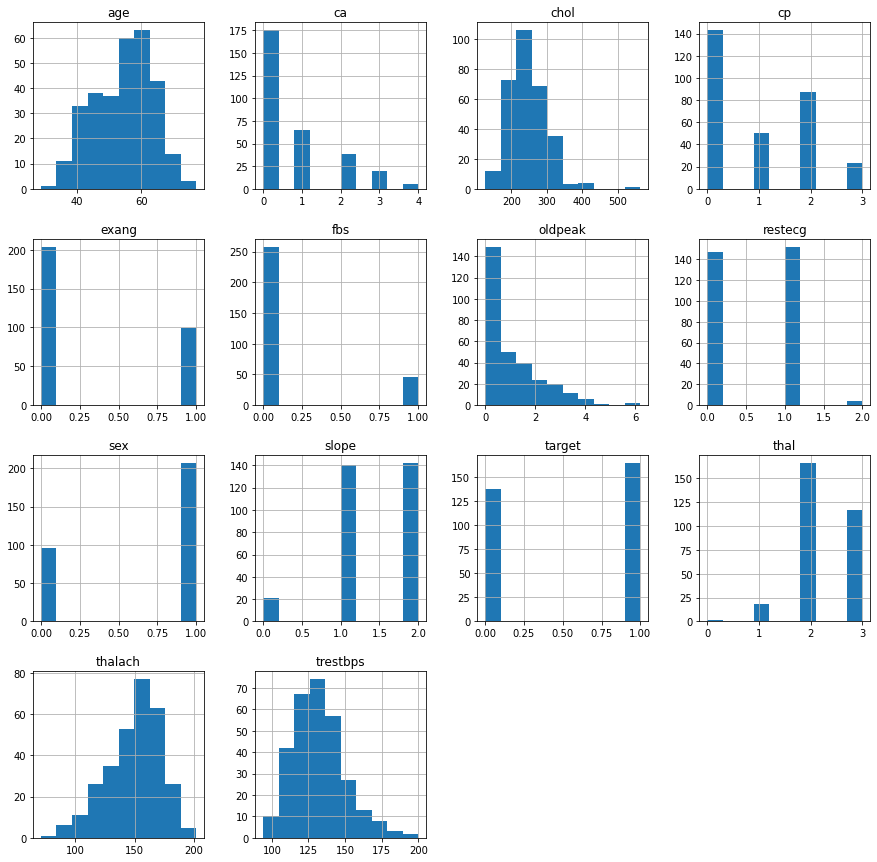

In [ ]:
# Checking data distribution
p = df_heart.hist(figsize=(15,15))

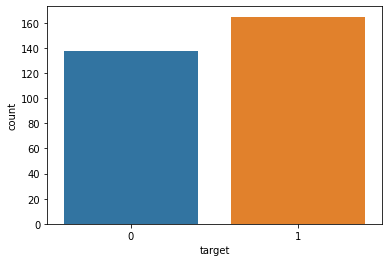

In [ ]:
# to check target variable distribution to check data is balance or not
sns.countplot(x=df_heart['target'], data=df_heart)

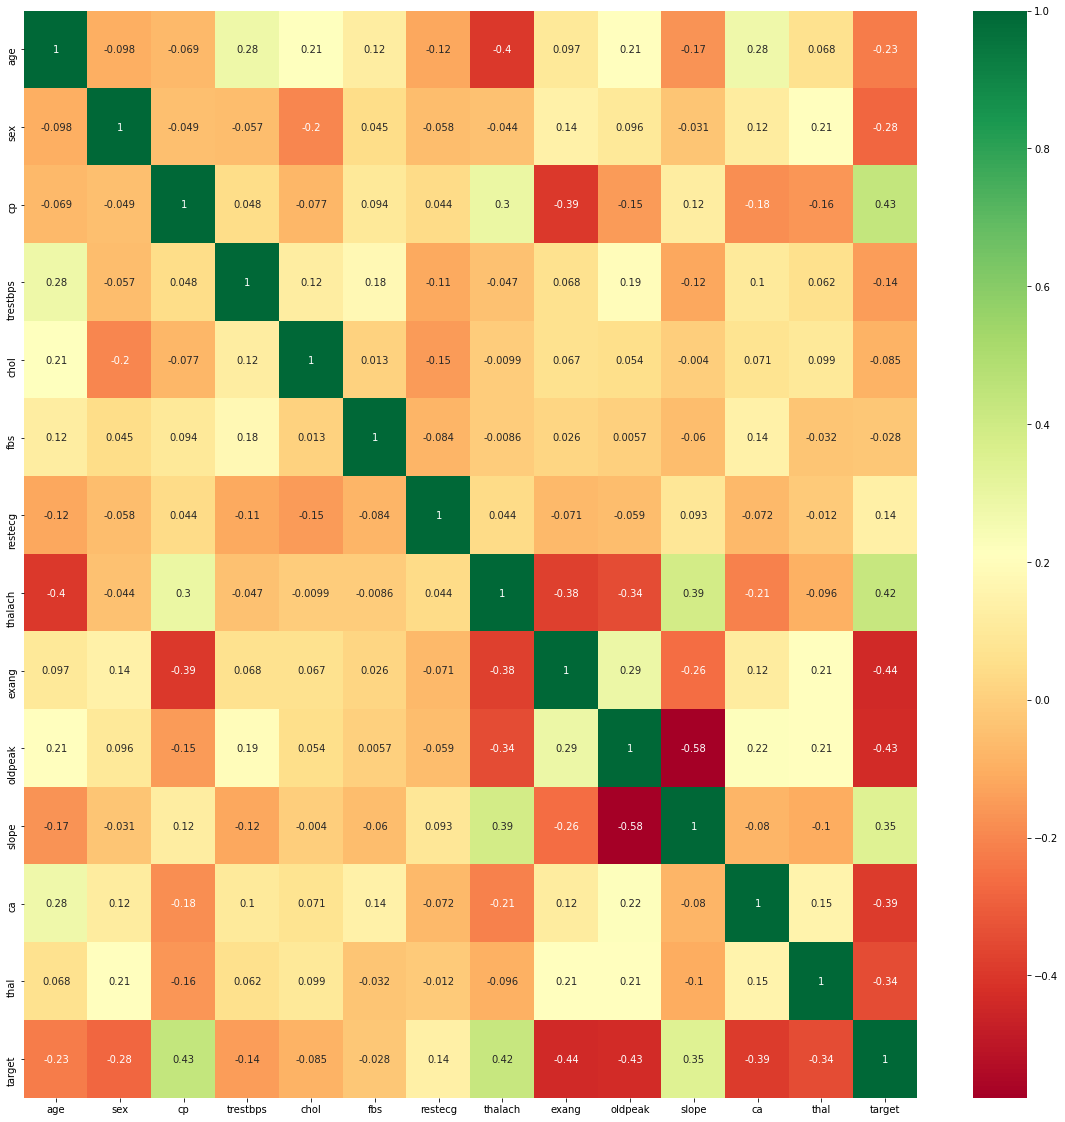

In [ ]:
# Checking Coorelation
corr_matrix = df_heart.corr()
plt.figure(figsize=(20,20))
sns.heatmap(data=corr_matrix, annot=True, cmap='RdYlGn')

# Feature Engineering

In [ ]:
# Convert ('sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal') variables into dummy variables because these variables are not ordinal variables.
newdf_heart = pd.get_dummies(df_heart, columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [ ]:
newdf_heart.columns

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target', 'sex_0',
       'sex_1', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'fbs_0', 'fbs_1', 'restecg_0',
       'restecg_1', 'restecg_2', 'exang_0', 'exang_1', 'slope_0', 'slope_1',
       'slope_2', 'ca_0', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_0', 'thal_1',
       'thal_2', 'thal_3'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
newdf_heart[columns_to_scale] = scaler.fit_transform(newdf_heart[columns_to_scale])

In [ ]:
from sklearn.model_selection import train_test_split
x = newdf_heart.drop(['target'], axis=1)
y = newdf_heart['target']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.3, random_state=0)
print("x_Train Size: {}, x_Test Size: {}:".format(x_train.shape,x_test.shape))

x_Train Size: (212, 30), x_Test Size: (91, 30):


# Model Evaluation

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
# First check KNN accuracy
knn_score = []
for i in range(1,20):
  clf_knn = KNeighborsClassifier(n_neighbors=i)
  cv_score = cross_val_score(clf_knn, x,y, cv=10)
  knn_score.append(round(cv_score.mean(),3))

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

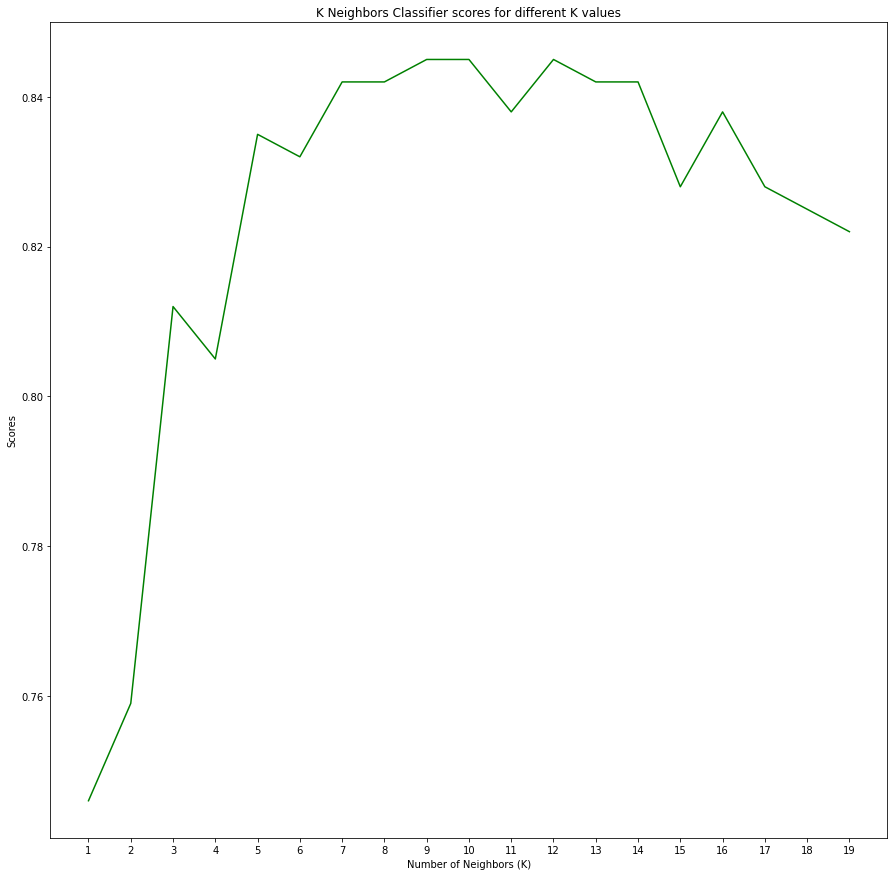

In [ ]:
# Plotting the results of knn_scores
plt.figure(figsize=(15,15))
plt.plot([k for k in range(1, 20)], knn_score, color = 'green')

plt.xticks([i for i in range(1, 20)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [ ]:
# Taking k value 12 and again accuracy
clf_knn = KNeighborsClassifier(n_neighbors=12)
cv_score = cross_val_score(clf_knn, x , y, cv=10)

print("KNN Accuracy on K=12 : {}%".format(round(cv_score.mean(),3)*100))

KNN Accuracy on K=12 : 84.5%


In [ ]:
# Check Accuracy for Decision Tree
decision_score = []
for i in range(1,20):
  clf_decision = DecisionTreeClassifier(max_depth=i)
  cv_score_dt = cross_val_score(clf_decision, x,y, cv=10)
  decision_score.append(round(cv_score_dt.mean(),3))

Text(0.5, 1.0, 'Decision Tree Classifier scores for different N values')

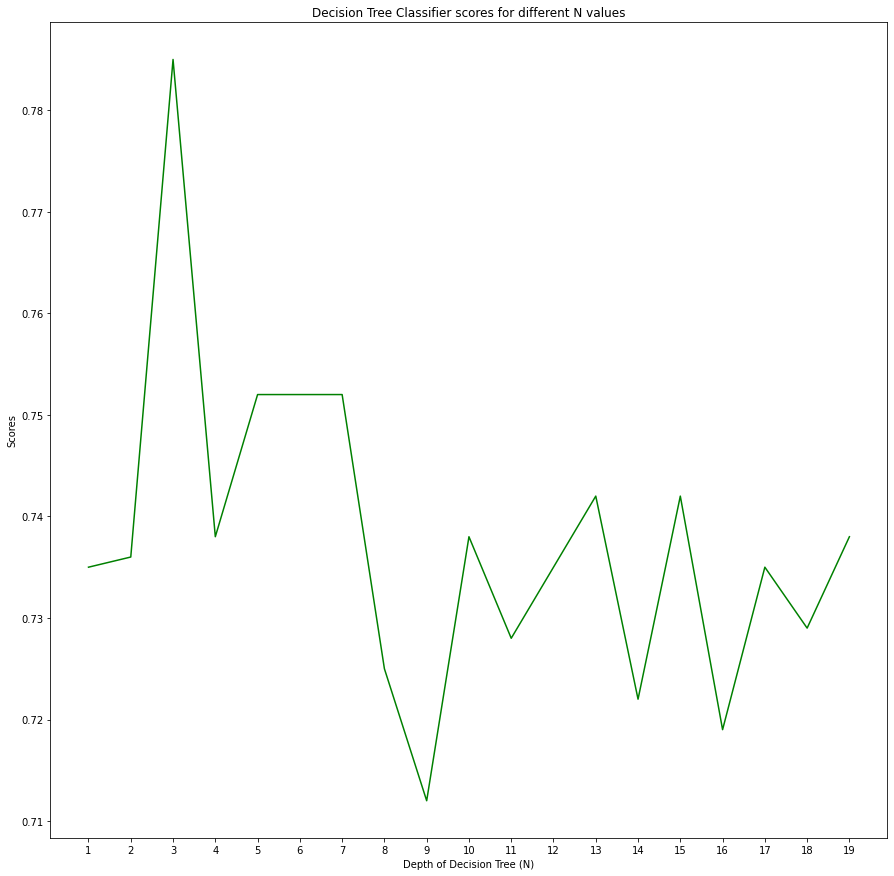

In [ ]:
# Plotting the results of Decision_scores
plt.figure(figsize=(15,15))
plt.plot([k for k in range(1, 20)], decision_score, color = 'green')

plt.xticks([i for i in range(1, 20)])
plt.xlabel('Depth of Decision Tree (N)')
plt.ylabel('Scores')
plt.title('Decision Tree Classifier scores for different N values')

In [ ]:
# Taking N value 3 and again accuracy
clf_decision = DecisionTreeClassifier(max_depth=3)
cv_score_dt = cross_val_score(clf_decision, x , y, cv=10)

print("Decision Tree Accuracy on N=3 : {}%".format(round(cv_score_dt.mean(),3)*100))

Decision Tree Accuracy on N=3 : 78.5%


In [ ]:
# # Check Accuracy for Random Forest
rf_score = []
for i in range(10,101,10):
  clf_ranfomforest = RandomForestClassifier(n_estimators=i)
  cv_score_rf = cross_val_score(clf_ranfomforest, x,y, cv=10)
  rf_score.append(round(cv_score_rf.mean(),3))

Text(0.5, 1.0, 'Random Forest Classifier scores for different N values')

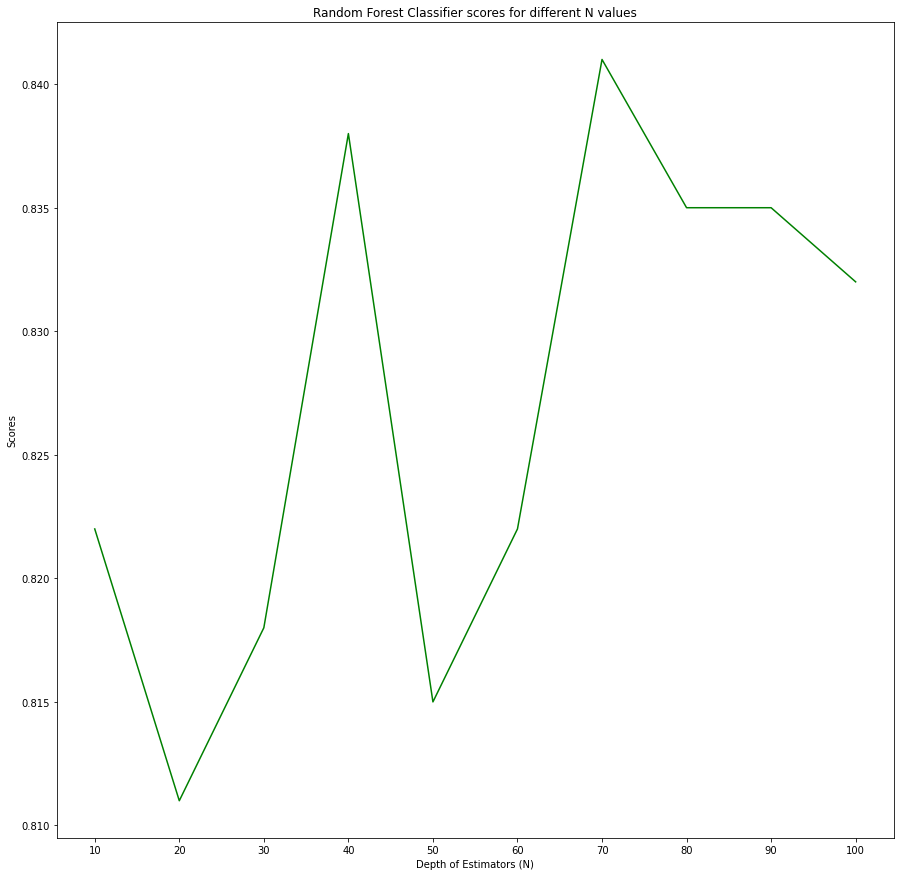

In [ ]:
# Plotting the results of Random_scores
plt.figure(figsize=(15,15))
plt.plot([k for k in range(10,101 ,10)], rf_score, color = 'green')

plt.xticks([i for i in range(10,101, 10)])
plt.xlabel('Depth of Estimators (N)')
plt.ylabel('Scores')
plt.title('Random Forest Classifier scores for different N values')

In [ ]:
# Taking again N=60, again check accuracy
clf_ranfomforest = RandomForestClassifier(n_estimators=70)
rf_score = cross_val_score(clf_ranfomforest, x, y, cv=10)
print("Random Forest Classifier Accuracy with n_estimators=60 is: {}%".format(round(rf_score.mean(), 4)*100))

Random Forest Classifier Accuracy with n_estimators=60 is: 83.46000000000001%


In [ ]:
clf_dt = DecisionTreeClassifier();
clf_rf = RandomForestClassifier();
clf_KNN = KNeighborsClassifier();

In [ ]:
# fit the model
clf_decision.fit(x_train,y_train);
clf_ranfomforest.fit(x_train,y_train);
clf_knn.fit(x_train,y_train);

In [ ]:
# run prediction on model
y_pred_dt = clf_decision.predict(x_test);
y_pred_rf = clf_ranfomforest.predict(x_test);
y_pred_knn = clf_knn.predict(x_test);

In [ ]:
# Create confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [ ]:
DT = confusion_matrix(y_test, y_pred_dt);
print("Decision Tree:", DT)

RF = confusion_matrix(y_test, y_pred_rf);
print("Random Forest:", RF)

KNN = confusion_matrix(y_test, y_pred_knn);
print("KNN:", KNN)

Decision Tree: [[28 16]
 [10 37]]
Random Forest: [[34 10]
 [ 6 41]]
KNN: [[33 11]
 [ 5 42]]


In [ ]:
# Accuracy on test set
from sklearn.metrics import classification_report, accuracy_score

score_dt = round(accuracy_score(y_test,y_pred_dt),4)*100
print("Accuracy on DT: {}%".format(score_dt))


score_rf = round(accuracy_score(y_test,y_pred_rf),4)*100
print("Accuracy on RF: {}%".format(score_rf))

score_knn = round(accuracy_score(y_test,y_pred_knn),4)*100
print("Accuracy on KNN: {}%".format(score_knn))


Accuracy on DT: 71.43%
Accuracy on RF: 82.42%
Accuracy on KNN: 82.42%


In [ ]:
print(classification_report(y_test,y_pred_rf))
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.85      0.77      0.81        44
           1       0.80      0.87      0.84        47

    accuracy                           0.82        91
   macro avg       0.83      0.82      0.82        91
weighted avg       0.83      0.82      0.82        91

              precision    recall  f1-score   support

           0       0.87      0.75      0.80        44
           1       0.79      0.89      0.84        47

    accuracy                           0.82        91
   macro avg       0.83      0.82      0.82        91
weighted avg       0.83      0.82      0.82        91



In [ ]:
# Prediction on training set
y_pred_rf_train = clf_ranfomforest.predict(x_train)
y_pred_knn_train = clf_knn.predict(x_train)


In [ ]:
# Accuracy check on Train data
score_rf_train = round(accuracy_score(y_train,y_pred_rf_train),4)*100
print("Accuracy on Train: {}%".format(score_rf_train))
score_knn_train = round(accuracy_score(y_train, y_pred_knn_train),4)*100
print("Accuracy on Train: {}%".format(score_knn_train))

Accuracy on Train: 100.0%
Accuracy on Train: 86.32%


On the bases of above result whether choose KNN or Random Forest, achieve same accuracy
